1. 산술논리연산

In [1]:
import cv2
img1 = cv2.imread("../data/images/img1.jpg")
img1 = cv2.resize(img1, (320, 240))
img2 = cv2.imread("../data/images/img2.jpg")
img2 = cv2.resize(img2, (320, 240))
img3 = cv2.imread("../data/images/img3.jpg")
img3 = cv2.resize(img3, (320, 240))
img4 = cv2.imread("../data/images/img4.jpg")
img4 = cv2.resize(img4, (320, 240))
img5 = cv2.imread("../data/images/img5.jpg")
img5 = cv2.resize(img5, (320, 240))

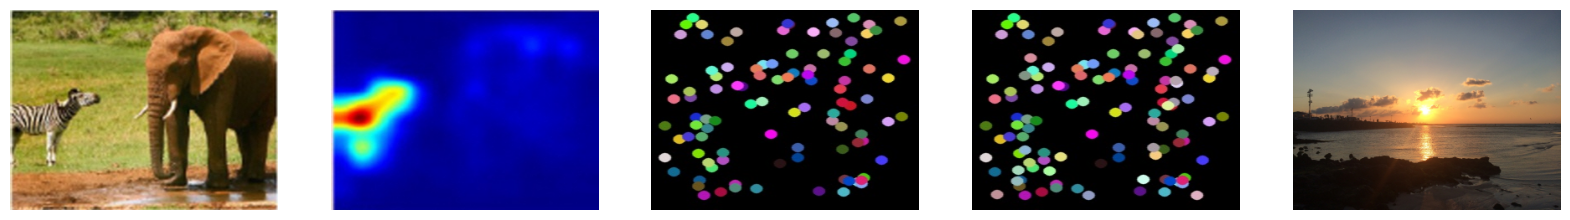

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
for idx, img in enumerate([img1, img2, img3, img4, img5]):
    plt.subplot(1, 5, idx+1)
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis("off")
plt.show()

In [6]:
img5.shape # height, width, channel

(240, 320, 3)

In [3]:
import numpy as np

# 마스크 선언 및 초기화
mask = np.full(shape=img5.shape, fill_value=0, dtype=np.uint8)
h, w, _ = img5.shape
x = (int)(w/2) - 60; y = (int)(h/2) - 60
cv2.rectangle(mask, (x, y), (x + 120, y + 120), (255, 255, 255), -1)

# 산술 밑 논리 연산 수행
ress = []
ress.append(cv2.add(img1, img2))

# 이미지에 가중치를 곱하는 방식
ress.append(cv2.addWeighted(img1, 0.5, img2, 0.5, 0))
ress.append(cv2.subtract(img3, img4))

# 뺄셈 연산을 수행한 후 절대값을 저장하는 방식
ress.append(cv2.absdiff(img3, img4))
ress.append(cv2.bitwise_not(img5))
ress.append(cv2.bitwise_and(img5, mask))

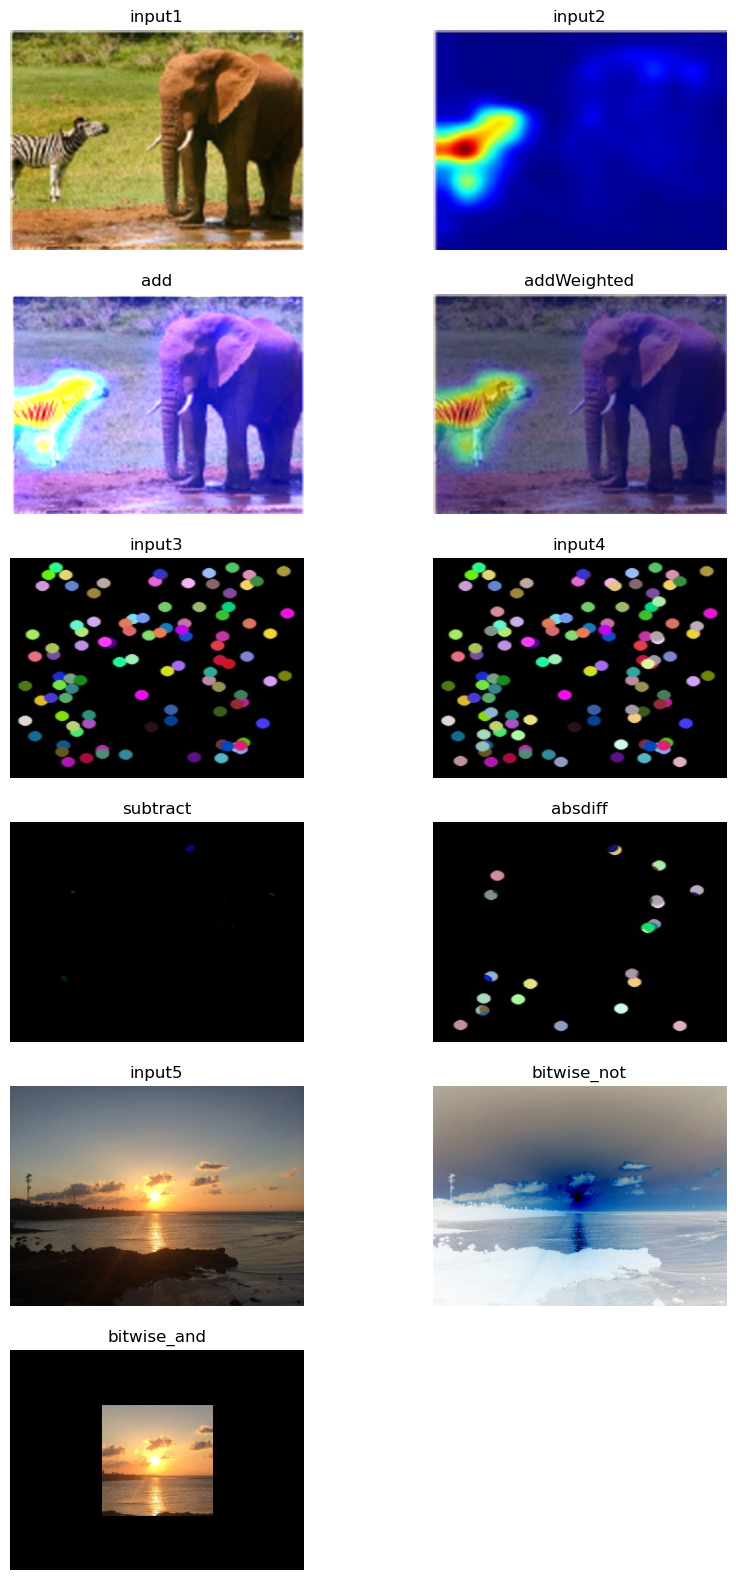

In [4]:
displays = [("input1", img1),
            ("input2", img2),
            ("add", ress[0]),
            ("addWeighted", ress[1]),
            ("input3", img3),
            ("input4", img4),
            ("subtract", ress[2]),
            ("absdiff", ress[3]),
            ("input5", img5),
            ("bitwise_not", ress[4]),
            ("bitwise_and", ress[5]),]
plt.figure(figsize=(10,20))
for idx,(name, out) in enumerate(displays):
    plt.subplot(6,2,idx+1)
    image = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(name)
    plt.axis("off")
plt.show()

2. 이미지연결

In [9]:
import cv2
import numpy as np

one = cv2.imread("../data/images/one.jpg")
two = cv2.imread("../data/images/two.jpg")
three = cv2.imread("../data/images/three.jpg")
four = cv2.imread("../data/images/four.jpg")
horizontal1 = np.full((50, one.shape[1], 3), [0, 0, 0],
dtype=np.uint8)
horizontal2 = np.full((50, two.shape[1], 3), (0, 0, 0),
dtype=np.uint8)
left = cv2.vconcat((one, horizontal1, three))
right = np.vstack((two, horizontal2, four))
vertical = np.full((left.shape[0], 50, 3), 0, dtype=np.uint8)
dst = cv2.hconcat((left, vertical, right))
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

3. 배경제거

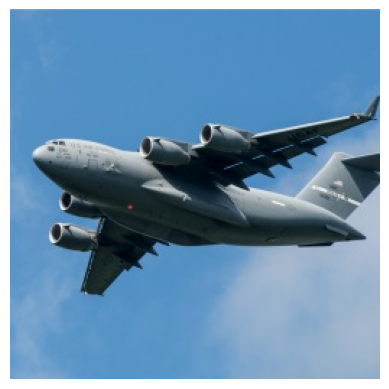

In [8]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("../data/images/plane_256x256.jpg")
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis("off")
plt.show()


In [19]:
import numpy as np
# 배경을 제거하고자 하는 전경 주위에 사각형 박스를 그리고 grabCut 알고리즘 적용

# 사각영역 : x, y, width, height
rect = (0, 56, 256, 150)

# 초기 마스크 생성
mask1 = np.zeros(image_rgb.shape[:2], np.uint8)

# grabCut에 사용할 임시 배열 생성
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# grabCut 실행
cv2.grabCut(image_rgb, # 원본이미지
            mask1, # 마스크
            rect, # 사각영역
            bgdModel, # 배경을 위한 임시 배열
            fgdModel, # 전경을 위한 임시 배열
            50, # 반복횟수
            cv2.GC_INIT_WITH_RECT) # 사각 영역으로 초기화

# 배경인 곳은 0, 그 외에는 1로 설정한 마스크 생성
mask2 = np.where((mask1==2) | (mask1==0), 0, 1).astype('uint8')
image_rgb_nobg = image_rgb * mask2[:, :, np.newaxis]

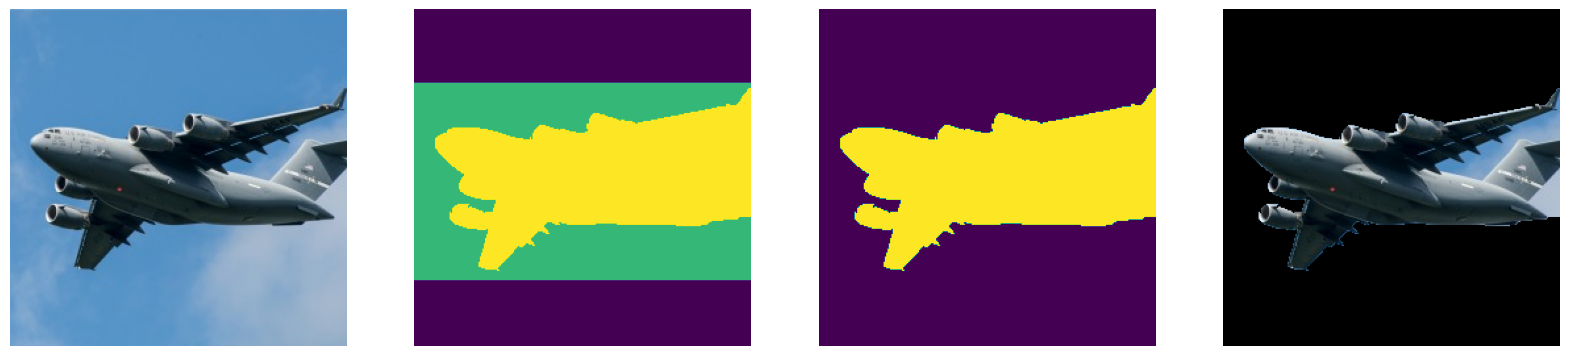

In [20]:
plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.imshow(image_rgb)
plt.axis("off")
plt.subplot(1, 4, 2)
plt.imshow(mask1)
plt.axis("off")
plt.subplot(1, 4, 3)
plt.imshow(mask2)
plt.axis("off")
plt.subplot(1, 4, 4)
plt.imshow(image_rgb_nobg)
plt.axis("off")
plt.show()

4. edge 검출

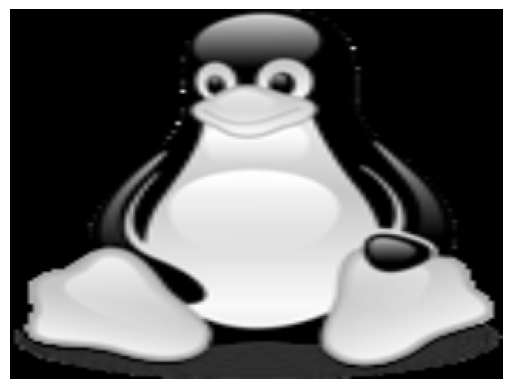

In [21]:
import cv2
import matplotlib.pyplot as plt
img1 = cv2.imread("../data/images/penguin.png", cv2.IMREAD_GRAYSCALE)
img1 = cv2.resize(img1, (320, 240))
plt.imshow(img1,cmap='gray')
plt.axis("off")
plt.show()

In [22]:
# cv2.GaussianBlur(이미지, 커널사이즈, x방향시그마)
img1_blue = cv2.GaussianBlur(img1, (3,3), 0)

# 소벨 필터, Sobel(이미지, cv2.FILTER_SCHARR, x미분차수, y미분차수, 커널사이즈)
res1 = cv2.Sobel(img1, cv2.FILTER_SCHARR, 1, 0, ksize=3)

# 샤를 필터, Scharr(이미지, cv2.FILTER_SCHARR, x미분차수, y미분차수, 커널사이즈)
res2 = cv2.Scharr(img1_blue, cv2.CV_32FC1, 0, 1)
res3 = cv2.Laplacian(img1_blue, cv2.CV_32FC1)

#cv2.Canny(이미지, 하단임계값, 상단임계값, 커널사이즈, 정규화옵션)
res4 = cv2.Canny(img1, 50, 200, apertureSize=5, L2gradient=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


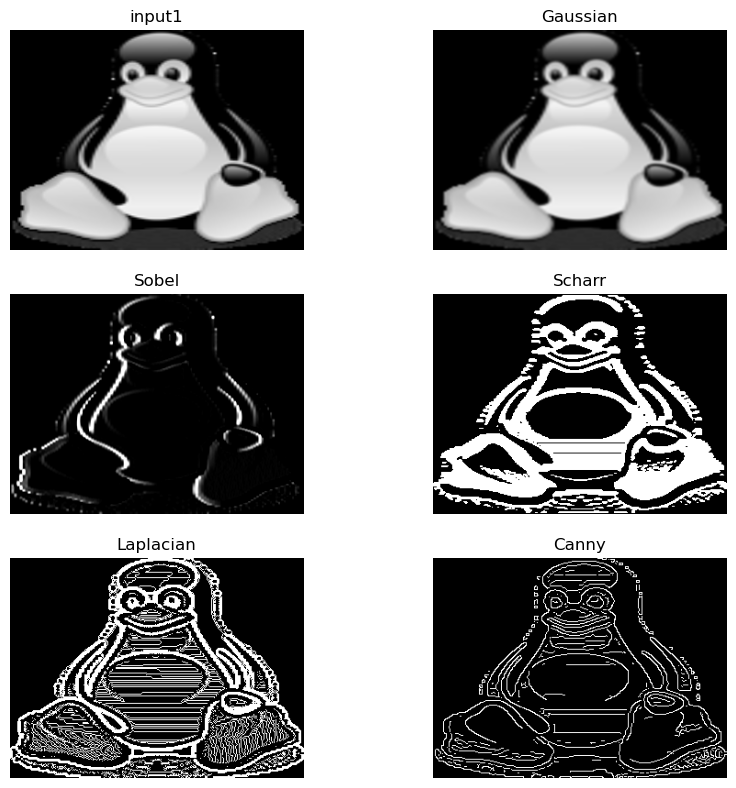

In [23]:
displays = [("input1", img1),
            ("Gaussian", img1_blue),
            ("Sobel", res1),
            ("Scharr", res2),
            ("Laplacian", res3),
            ("Canny", res4)]
plt.figure(figsize=(10,20))
for idx,(name, out) in enumerate(displays):
    plt.subplot(6,2,idx+1)
    image = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(name)
    plt.axis("off")
plt.show()

5. 히스토그램평탄화

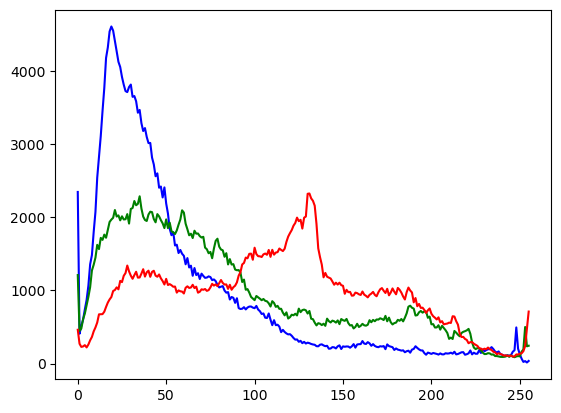

In [35]:
# 컬러이미지 B G R 히스토그램 그려보기

img1 = cv2.imread("../data/images/apple.jpg")
channels = cv2.split(img1)
colors = ('b', 'g', 'r')
for (ch, color) in zip (channels, colors):
    hist = cv2.calcHist([ch], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
plt.show()

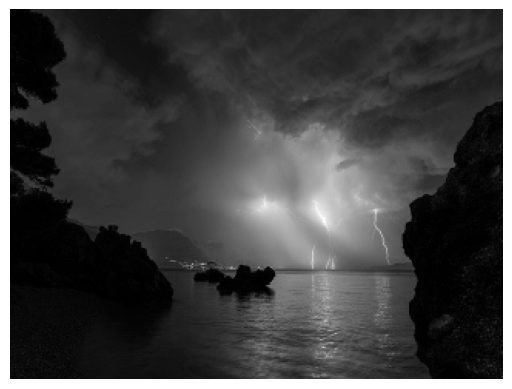

In [27]:
import cv2
from matplotlib import pyplot as plt
img1 = cv2.imread("../data/images/img6.jpg",
cv2.IMREAD_GRAYSCALE)
img1 = cv2.resize(img1, (320, 240))
plt.imshow(img1,cmap='gray')
plt.axis("off")
plt.show()

In [28]:
import numpy as np

# 히스토그램 평탄화(평활화)
res1 = cv2.equalizeHist(img1)
ch1 = [0]
ranges1 = [0, 256]
histSize1 = [256]

# 히스토그램 계산
hist1 = cv2.calcHist([img1], ch1, None, histSize1, ranges1)
hist2 = cv2.calcHist([res1], ch1, None, histSize1, ranges1)

# 상수곱, 로그곱, 거듭제곱 변환 기반 명암비 조절 및 히스토그램 계산
multi_lut = np.full(shape=[256], fill_value=0, dtype=np.uint8)
log_lut = np.full(shape=[256], fill_value=0, dtype=np.uint8)
invol1_lut = np.full(shape=[256], fill_value=0, dtype=np.uint8)
multi_v = 2; gamma1 = 0.4
thres1 = 5; thres2 = 100
max_v_log = 255 / np.log(1 + 255)
max_v_invol1 = 255 / np.power(255, gamma1)
for i in range(256):
    val = i * multi_v
    if val > 255 : val = 255
    multi_lut[i] = val
    log_lut[i] = np.round(max_v_log * np.log(1+i))
    
# 명암비 조절
res2 = cv2.LUT(img1, multi_lut)
res3 = cv2.LUT(img1, log_lut)
hist3 = cv2.calcHist([res2], ch1, None, histSize1, ranges1)
hist4 = cv2.calcHist([res3], ch1, None, histSize1, ranges1)

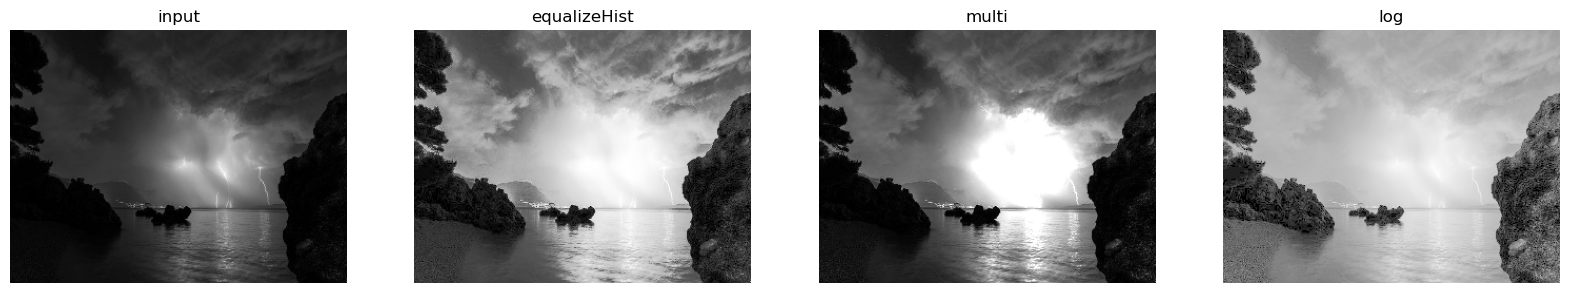

In [29]:
bin_x = np.arange(256)
fig_index = 0
displays = [("input", img1),
            ("equalizeHist", res1),
            ("multi", res2),
            ("log", res3)]
plt.figure(figsize=(20,5))
for idx,(name, out) in enumerate(displays):
    plt.subplot(1,4,idx+1)
    image = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(name)
    plt.axis("off")
plt.show()

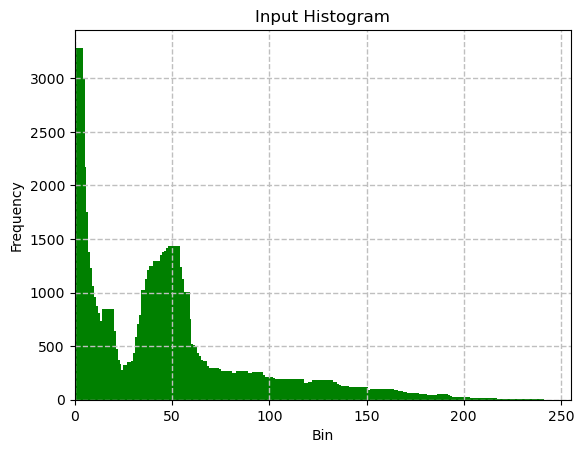

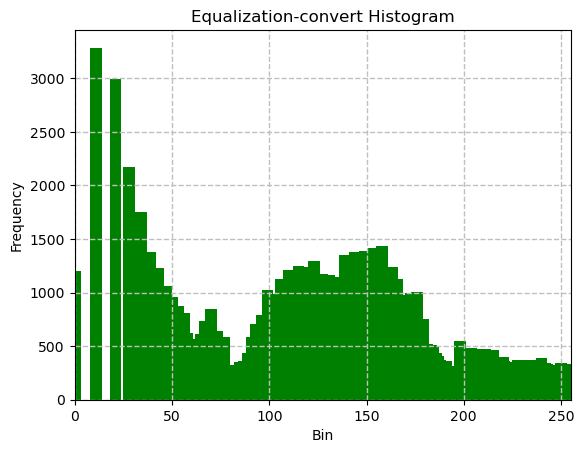

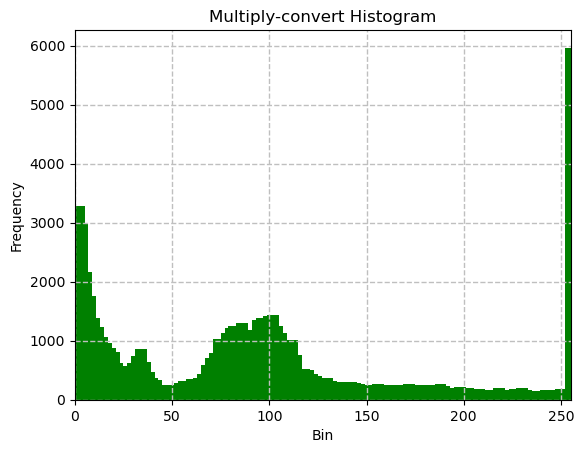

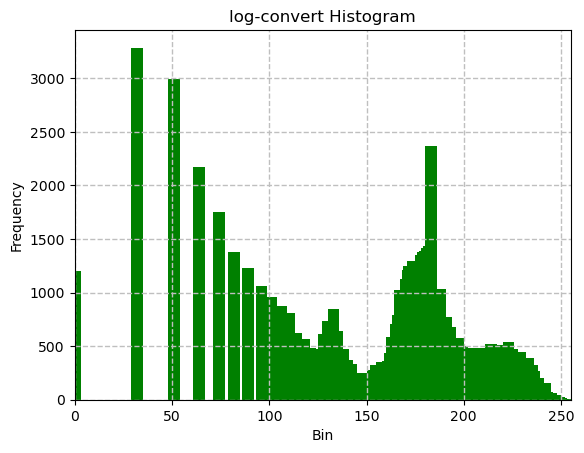

In [30]:
dlsplay_hist = [("Input Histogram", hist1),
                ("Equalization-convert Histogram", hist2),
                ("Multiply-convert Histogram", hist3),
                ("log-convert Histogram", hist4)]
for (name, out) in dlsplay_hist:
    plt.figure(fig_index)
    plt.title(name); plt.xlabel("Bin"); plt.ylabel("Frequency")
    plt.bar(bin_x, out[:,0], width=6, color='g')
    plt.grid(True, lw=1, ls='--', c='.75')
    plt.xlim([0, 255])
    fig_index += 1
plt.show()

6. 트랙바

In [3]:
import cv2
import numpy as np
def onChangeBlue(pos):
    global b
    b = pos
    cv2.imshow("Palette", createImage(b, g, r))

def createImage(b, g, r):
    return np.full((500, 500, 3), (b, g, r), dtype=np.uint8)
b, g, r = 0, 0, 0
cv2.namedWindow("Palette")
cv2.createTrackbar("Blue", "Palette", 55, 255, onChangeBlue)
                                                # 트랙바 변경 이벤트 처리 함수
cv2.createTrackbar("Green", "Palette", 0, 255, lambda x:x)
cv2.createTrackbar("Red", "Palette", 0, 255, lambda x:x)
while True:
    g = cv2.getTrackbarPos("Green", "Palette")
    r = cv2.getTrackbarPos("Red", "Palette")

    cv2. imshow("Palette", createImage(b, g, r))
    if cv2.waitKey(33) & 0xFF == ord('q'): # q 키를 누르면 종료
                # (0) 무한대기
        break
cv2.destroyAllWindows()

In [6]:
ord('q')

113

In [5]:
ord('A') # 문자코드

65

7. kmeans 색상선택

In [17]:
# kmeans를 이용한 색상 선택
import numpy as np
import cv2

img1 = cv2.imread("../data/images/winter.jpg")
img1 = cv2.resize(img1, (320, 240))
cv2.imshow("input", img1)
data = img1.reshape((-1, 3))
data = np.float32(data)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
attempts = 10
# flags = cv2.KMEANS_RANDOM_CENTERS # 중심좌표 선택 전략 = 랜덤
flags = cv2.KMEANS_PP_CENTERS # 중심좌표 선택 전략
for i in range(1, 15):
    numK = i * 5 # 클러스터 수(클수록 다양한 색상 표현)
    ret, label, center = cv2.kmeans(data, numK, None, criteria, attempts, flags)
    # 결과 영상 출력
    center = np.uint8(center)
    res = center[label.flatten()]
    res = res.reshape((img1.shape))
    cv2.imshow('k='+str(numK), res)
    cv2.waitKey(1)
cv2.waitKey(0)
cv2.destroyAllWindows()

8. 투시변환

In [19]:
import numpy as np
import cv2

img1 = cv2.imread("../data/images/winter.jpg", cv2.IMREAD_GRAYSCALE)
img1 = cv2.resize(img1, (320, 240))

# 투시 변환 수행
h, w = img1.shape
point1_src = np.float32([[1,1], [w-10,10], [5,h-5], [w-4,h-4]])
point1_dst = np.float32([[15,15], [w-60,15], [10,h-25], [w-100,h-50]])
point2_src = np.float32([[148,145], [168,144], [136,223], [188,222]])
point2_dst = np.float32([[136,145], [188,144], [136,223], [188,222]])
per_mat1 = cv2.getPerspectiveTransform(point1_src, point1_dst)
per_mat2 = cv2.getPerspectiveTransform(point2_src, point2_dst)
res1 = cv2.warpPerspective(img1, per_mat1, (w,h))
res2 = cv2.warpPerspective(img1, per_mat2, (w,h))
displays = [("input1", img1),
            ("res1", res1),
            ("res2", res2)]
for (name, out) in displays:
    cv2.imshow(name, out)
cv2.waitKey(0)
cv2.destroyAllWindows()